# Midterm
To run this notebook please make sure it runs on python 3.12 and neccesery  packages for jupyter notebook

## setting enviroment
Neccesery libraries to install

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## First part

In [10]:
# load data
data_dg=pd.read_csv("data/DG.csv")
data_hig=pd.read_csv("data/HIG.csv")
data_hpe=pd.read_csv("data/HPE.csv")
data_hwm=pd.read_csv("data/HWM.csv")

# check the data
data_dg.info()
#data_hig
#data_hpe
#data_hwm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1510 non-null   object 
 1   Open          1510 non-null   float64
 2   High          1510 non-null   float64
 3   Low           1510 non-null   float64
 4   Close         1510 non-null   float64
 5   Volume        1510 non-null   int64  
 6   Dividends     1510 non-null   float64
 7   Stock Splits  1510 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 94.5+ KB


Task 1 - we can see that for dg, hig, hpe and hwm there are days with same close and open value

In [28]:
#data_dg[data_dg["Open"]==data_dg["Close"]]
#data_hig[data_hig["Open"]==data_hig["Close"]]
#data_hpe[data_hpe["Open"]==data_hpe["Close"]]
data_hwm[data_hwm["Open"]==data_hwm["Close"]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
56,2017-03-24,25.750,25.953,25.451,25.750,2931200,0.0,0.0
80,2017-04-28,26.377,26.532,26.233,26.377,4363000,0.0,0.0
184,2017-09-26,25.471,25.549,25.287,25.471,3388400,0.0,0.0
276,2018-02-07,24.444,24.794,24.220,24.444,5549200,0.0,0.0
363,2018-06-13,17.561,17.629,17.405,17.561,4944200,0.0,0.0
418,2018-08-30,21.628,22.010,21.462,21.628,3491800,0.0,0.0
424,2018-09-10,21.550,21.756,21.501,21.550,2223500,0.0,0.0
470,2018-11-13,19.766,20.287,19.579,19.766,5076400,0.0,0.0
512,2019-01-16,19.756,20.021,19.491,19.756,5559300,0.0,0.0
545,2019-03-06,18.352,18.687,18.263,18.352,4824700,0.0,0.0


Task 2

In [20]:
max_low = pd.DataFrame([
    ["dg", data_dg["Close"].max(), data_dg["Close"].min()],
    ["hig", data_hig["Close"].max(), data_hig["Close"].min()],
    ["hwm", data_hwm["Close"].max(), data_hwm["Close"].min()],
    ["hpe", data_hpe["Close"].max(), data_hpe["Close"].min()],
], columns=["Name",'Max', 'Min'])

max_low

,Name,Max,Min
0,dg,251.814,62.481
1,hig,73.808,23.613
2,hwm,39.143,10.475
3,hpe,16.278,6.753


Task 3

# Second Part

In [30]:
# load dataset
data_sp=pd.read_csv("data/companies_no_subindustry.csv")
data_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       503 non-null    object
 1   Security     503 non-null    object
 2   GICS_Sector  503 non-null    object
 3   hq           503 non-null    object
 4   included     458 non-null    object
 5   Founded      503 non-null    object
dtypes: object(6)
memory usage: 23.7+ KB


Task 1

In [37]:
# compute missing values
data_sp.fillna(0, inplace = True)
len(data_sp[data_sp["included"]==0])

45

Task 2

In [64]:
# load again clean dataset (yes, it can be done nicer..)
data_sp=pd.read_csv("data/companies_no_subindustry.csv")
data_sp["included"].dropna(inplace = True)
data_sp["Founded"] = pd.to_datetime(data_sp["Founded"], dayfirst=True, errors='coerce')
min_date = data_sp["Founded"].min()
max_date = data_sp["Founded"].max()
# odlest company
data_sp[data_sp["Founded"]==min_date]

,Symbol,Security,GICS_Sector,hq,included,Founded
71,BK,BNY Mellon,Financials,"New York City, New York",31.03.1995,1784-01-01


In [65]:
# youngest company
data_sp[data_sp["Founded"]==max_date]

,Symbol,Security,GICS_Sector,hq,included,Founded
481,WBD,Warner Bros. Discovery,Communication Services,"New York City, New York",11.04.2022,2022-01-01


In [69]:
data_sp["Founded"].mean() # which mean that the company is 73 years old or do it by today() 

Timestamp('1951-09-24 22:45:21.382289408')

Task 4

In [77]:
# having state 
data_sp["state"] = data_sp["hq"].str.split(", ", expand=True)[1]

<Axes: >

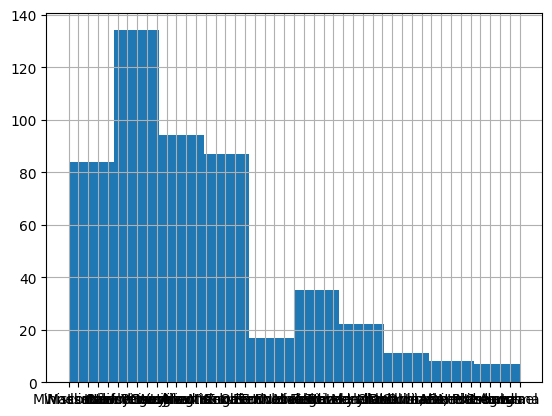

In [80]:
data_sp["state"].hist() # we can not see the names properly bu we can conlude that is not evenly distributed

Task 3

In [86]:
data_sp.groupby(['GICS_Sector']).str.sum().plot.pie() # not working maybe cost type

AttributeError: 'DataFrameGroupBy' object has no attribute 'str'